In [1]:
# Librerías

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pi=np.pi

### Gráfica del .nb

/tmp/ipykernel_97670/4074876567.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-1,110])


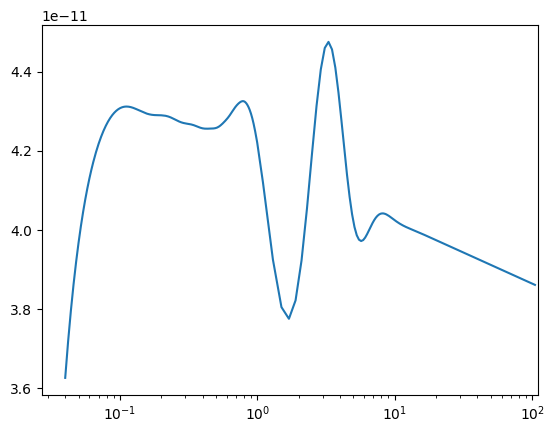

In [16]:
dataGallego=pd.read_csv('TablePQm1.dat',delimiter='\t',header=None)
dataGallego
plt.plot(dataGallego[0],dataGallego[1])
plt.xscale('log')
plt.xlim([-1,110])
plt.show()

### Analisis para el run con modificaciones personales

In [27]:
path = '../build_phi2/spectra_scalar_0.txt'
file = np.loadtxt(path)
step = 34
tmax = 10000
data = np.zeros((tmax,step,2))
for i in range(tmax):
    data[i,::,0] = file[step*i:step*(i+1),0]
    data[i,::,1] = file[step*i:step*(i+1),1]
data

array([[[3.00000000e-03, 1.33930608e-20],
        [6.00000000e-03, 1.19893753e-19],
        [9.00000000e-03, 1.81857575e-19],
        ...,
        [9.60000000e-02, 2.80782917e-19],
        [9.90000000e-02, 8.98795769e-20],
        [1.02000000e-01, 2.09532776e-20]],

       [[3.00000000e-03, 6.78159560e-21],
        [6.00000000e-03, 6.06220724e-20],
        [9.00000000e-03, 9.22142442e-20],
        ...,
        [9.60000000e-02, 1.43816175e-19],
        [9.90000000e-02, 4.71209980e-20],
        [1.02000000e-01, 1.03991359e-20]],

       [[3.00000000e-03, 3.75982206e-21],
        [6.00000000e-03, 3.35528521e-20],
        [9.00000000e-03, 5.12102318e-20],
        ...,
        [9.60000000e-02, 8.20001132e-20],
        [9.90000000e-02, 2.73932456e-20],
        [1.02000000e-01, 5.58737508e-21]],

       ...,

       [[3.00000000e-03, 4.70861987e-22],
        [6.00000000e-03, 1.89153627e-21],
        [9.00000000e-03, 8.69355799e-22],
        ...,
        [9.60000000e-02, 6.90235372e-23],
     

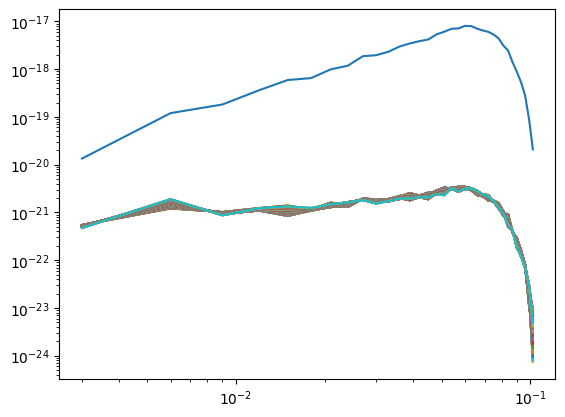

In [185]:
plt.loglog(data[0,::,0],data[0,::,1])
for i in range(9900,9999):
    plt.loglog(data[i,::,0],data[i,::,1])
plt.show()

In [ ]:
# Animation
import matplotlib.animation as animation
fig, ax = plt.subplots()
x1 = data[0,::,0]
y1 = data[0,::,1]
line1, = ax.plot(x1, y1)
x = data[0,::,0]
y = data[0,::,1]
line, = ax.plot(x, y)
def animate(i):
    line.set_ydata(data[i,::,1])
    line1.set_ydata(data[i,::,1])
    plt.xscale('log')
    plt.yscale('log')
    plt.title('t = '+str(i))
    plt.ylim([1e-25,1e-16])
    return line,
ani = animation.FuncAnimation(fig, animate, frames=9999, interval=5, blit=True)
# plt.show()
# ani.save('animation', writer='ffmpeg', fps=30)
ani.save('animation.gif', fps=15)

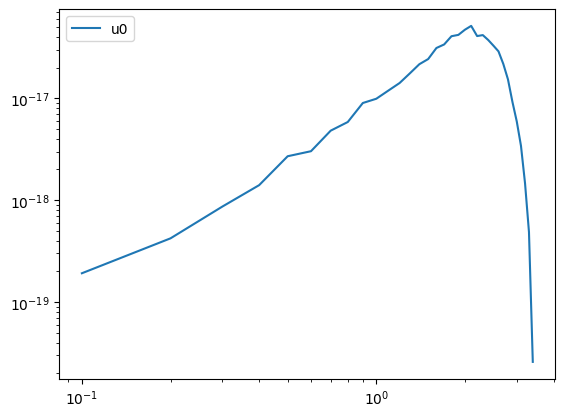

In [3]:
u0 = pd.DataFrame(pd.read_csv('spectraunits_0.csv', header=None, delimiter=' '))
#kIR era 0.1 sin querer

plt.loglog(u0[0],u0[1], label='u0', linestyle='-')

plt.legend()

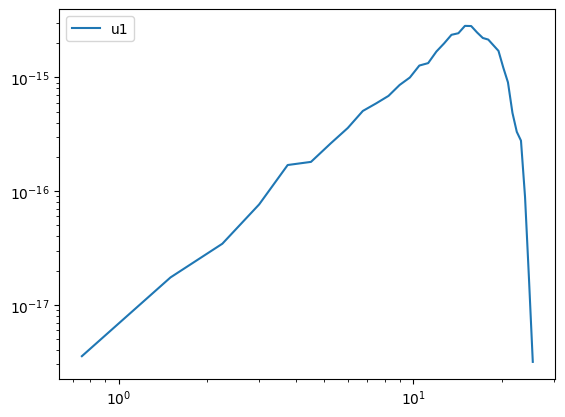

In [4]:
u1 = pd.DataFrame(pd.read_csv('spectraunits_1.csv', header=None, delimiter=' '))
#kIR ahora es 0.75, loq ue trae por defecto

plt.loglog(u1[0],u1[1], label='u1', linestyle='-')

plt.legend()

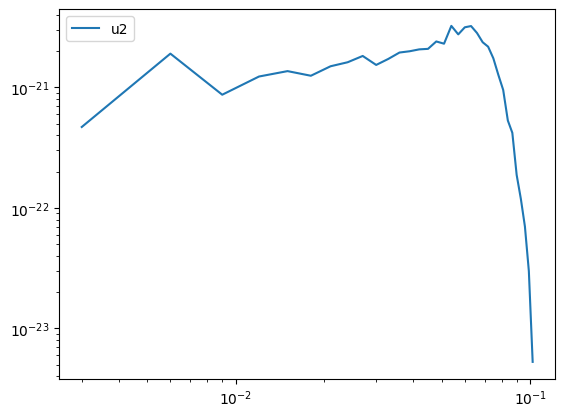

In [ ]:
u2 = pd.DataFrame(pd.read_csv('spectra10000.csv', header=None, delimiter=' '))
#kIR se cambió a 0.003 para abarvar el dominio de alexander

plt.loglog(u2[0],u2[1], label='u2', linestyle='-')

plt.legend()

# Related to unit changing

In [18]:
k=mpgev#2.75772e15
gamma=9.38834e25
fStar=3.91027e19
omegastar=(gamma)*0.5 * fStar

k0_machine=k/omegastar
k0_machine

<Quantity 1.3267561e-27 GeV>

In [3]:
from astropy import constants as cons, units as u

lp = (cons.hbar*cons.G/cons.c**3)**0.5
lpgev = (lp.to(u.m)/(cons.hbar*cons.c)).to(u.GeV**-1)
lpgev

<Quantity 8.19074523e-20 1 / GeV>

In [6]:
#Masas de planck segun cosmolattice
mp = 2.44e18 #Reducida
Mp = 1.22e19
#Masa de planck calculada
Mpgev = ((cons.hbar*cons.c/cons.G)**0.5*cons.c**2).to(u.GeV)
mpgev = Mpgev/(8*pi)**0.5
print('M_p en GeV:', Mpgev)

#Megaparsecs
Mpc_nat = u.Mpc/(cons.hbar.to(u.GeV*u.s)*cons.c.to(u.Mpc/u.s))
print('Mpc natural en GeV:', Mpc_nat)
Mpc_geo = mpgev*Mpc_nat

print('Mpc geometrizado:', Mpc_geo)

M_p en GeV: 1.2208901285838954e+19 GeV
Mpc natural en GeV: 1.5637383059878982e+38 1 / GeV
Mpc geometrizado: 3.808208582004792e+56


In [7]:
print('Mpc^-1 geom. en GeV:', 1/Mpc_geo)

Mpc^-1 geom. en GeV: 2.6259065869589534e-57


In [8]:
# Una librería que sirvió hasta cierto punto

import natpy as nat

nat.set_active_units([nat.const.c, nat.const.hbar, mpgev])

nat.convert(nat.Mpc, nat.GeV**-1)

np.float64(1.5637383059878976e+38)

In [9]:
# Cálculo de k0
k0_geo = 1.13e-3
k0_nat = mpgev*k0_geo*Mpc_geo
format(k0_nat,".3e")

'1.048e+72 GeV'

In [10]:
print('hbar.c =', cons.hbar*cons.c)
print('\t=', cons.hbar.to(u.GeV*u.s)*cons.c.to(u.Mpc/u.s))
print('1 Mpc/hbar.c =', u.Mpc / (cons.hbar.to(u.GeV*u.s)*cons.c.to(u.Mpc/u.s)) )
print('\t= ', u.Mpc.to(u.m)*u.m / (cons.hbar.to(u.GeV*u.s)*cons.c)) 

hbar.c = 3.1615267734966903e-26 J m
	= 6.394931915211004e-39 GeV Mpc
1 Mpc/hbar.c = 1.5637383059878982e+38 1 / GeV
	=  1.563738305987898e+38 1 / GeV
